In [25]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dfTrue = pd.read_csv('True.csv')
dfFake= pd.read_csv('Fake.csv')

In [4]:
dfTrue['isFake'] = 0
dfFake['isFake'] = 1

In [5]:
combinedDF = pd.concat([dfTrue, dfFake], axis=0)
combinedAndShuffeldDF = combinedDF.sample(frac=1).reset_index(drop=True)

In [6]:
df = combinedAndShuffeldDF

In [7]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)

In [8]:
df['text'] = df['text'].apply(preprocess_text)
df['title'] = df['title'].apply(preprocess_text)

In [9]:
vectorizer_text = TfidfVectorizer(max_features=5000)
vectorizer_title = TfidfVectorizer(max_features=5000)

vectorized_text = vectorizer_text.fit_transform(df['text'])
vectorized_title = vectorizer_title.fit_transform(df['title'])

X = hstack([vectorized_text, vectorized_title])

y = df['isFake']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)


Exploratory data analysis

Bulding The Models

In [11]:
df['subject'].unique()

array(['politics', 'worldnews', 'politicsNews', 'News', 'Middle-east',
       'left-news', 'Government News', 'US_News'], dtype=object)

In [32]:
models = [
    ('GradientBoosting Classifier', GradientBoostingClassifier()),
    ('RandomForest Classifier', RandomForestClassifier()),
    ('AdaBoosting Classifier', AdaBoostClassifier())
]


GradientBoosting Classifier Accuracy Score: 99.63%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5331
           1       1.00      0.99      1.00      5894

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



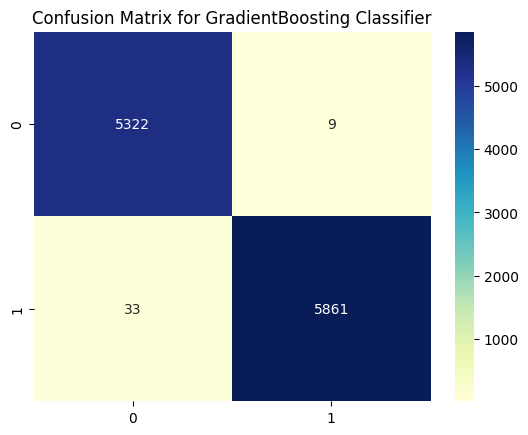

RandomForest Classifier Accuracy Score: 99.88%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5331
           1       1.00      1.00      1.00      5894

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



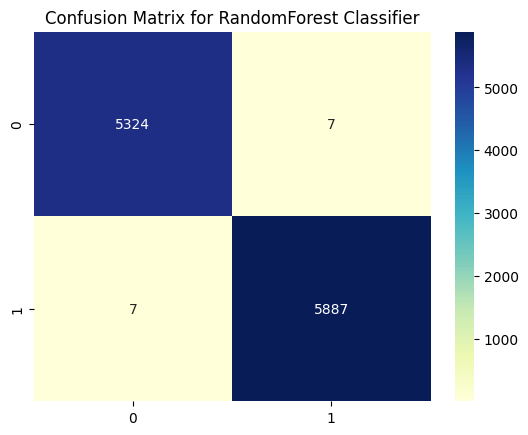

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoosting Classifier Accuracy Score: 99.8%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5331
           1       1.00      1.00      1.00      5894

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



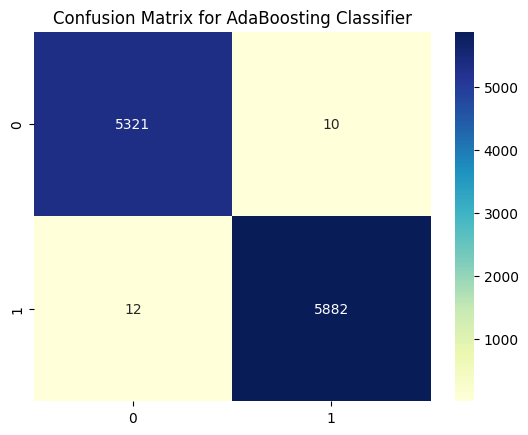

In [33]:
for name, model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print(f'{name} Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')
    
    print(classification_report(y_test, y_pred))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True, cmap="YlGnBu")
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
